This example uses the "seeds" dataset from the UCI machine learning database. More info can be found here: https://archive-beta.ics.uci.edu/dataset/236/seeds

The data set can be used for the tasks of classification and cluster analysis.
To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
8. variety

All of these parameters were real-valued continuous.

In [1]:
# first we will download the data directly from the web

import json
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

# data_file = '../data/seeds_dataset.txt'
data_cols = ['area', 'perimeter','compactness','length','width','asym','groove', 'variety']

data = pd.read_csv(data_url, sep = '\t', error_bad_lines=False, names = data_cols, index_col=None)
data

/var/folders/1z/b51_h5pj2n37kyl3zp0xnlx80000gn/T/ipykernel_94031/1174336881.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(data_url, sep = '\t', error_bad_lines=False, names = data_cols, index_col=None)
Skipping line 8: expected 8 fields, saw 10
Skipping line 36: expected 8 fields, saw 10
Skipping line 61: expected 8 fields, saw 9
Skipping line 69: expected 8 fields, saw 9
Skipping line 107: expected 8 fields, saw 9
Skipping line 136: expected 8 fields, saw 9
Skipping line 170: expected 8 fields, saw 9
Skipping line 171: expected 8 fields, saw 9
Skipping line 173: expected 8 fields, saw 9
Skipping line 202: expected 8 fields, saw 9
Skipping line 204: expected 8 fields, saw 9



,area,perimeter,compactness,length,width,asym,groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


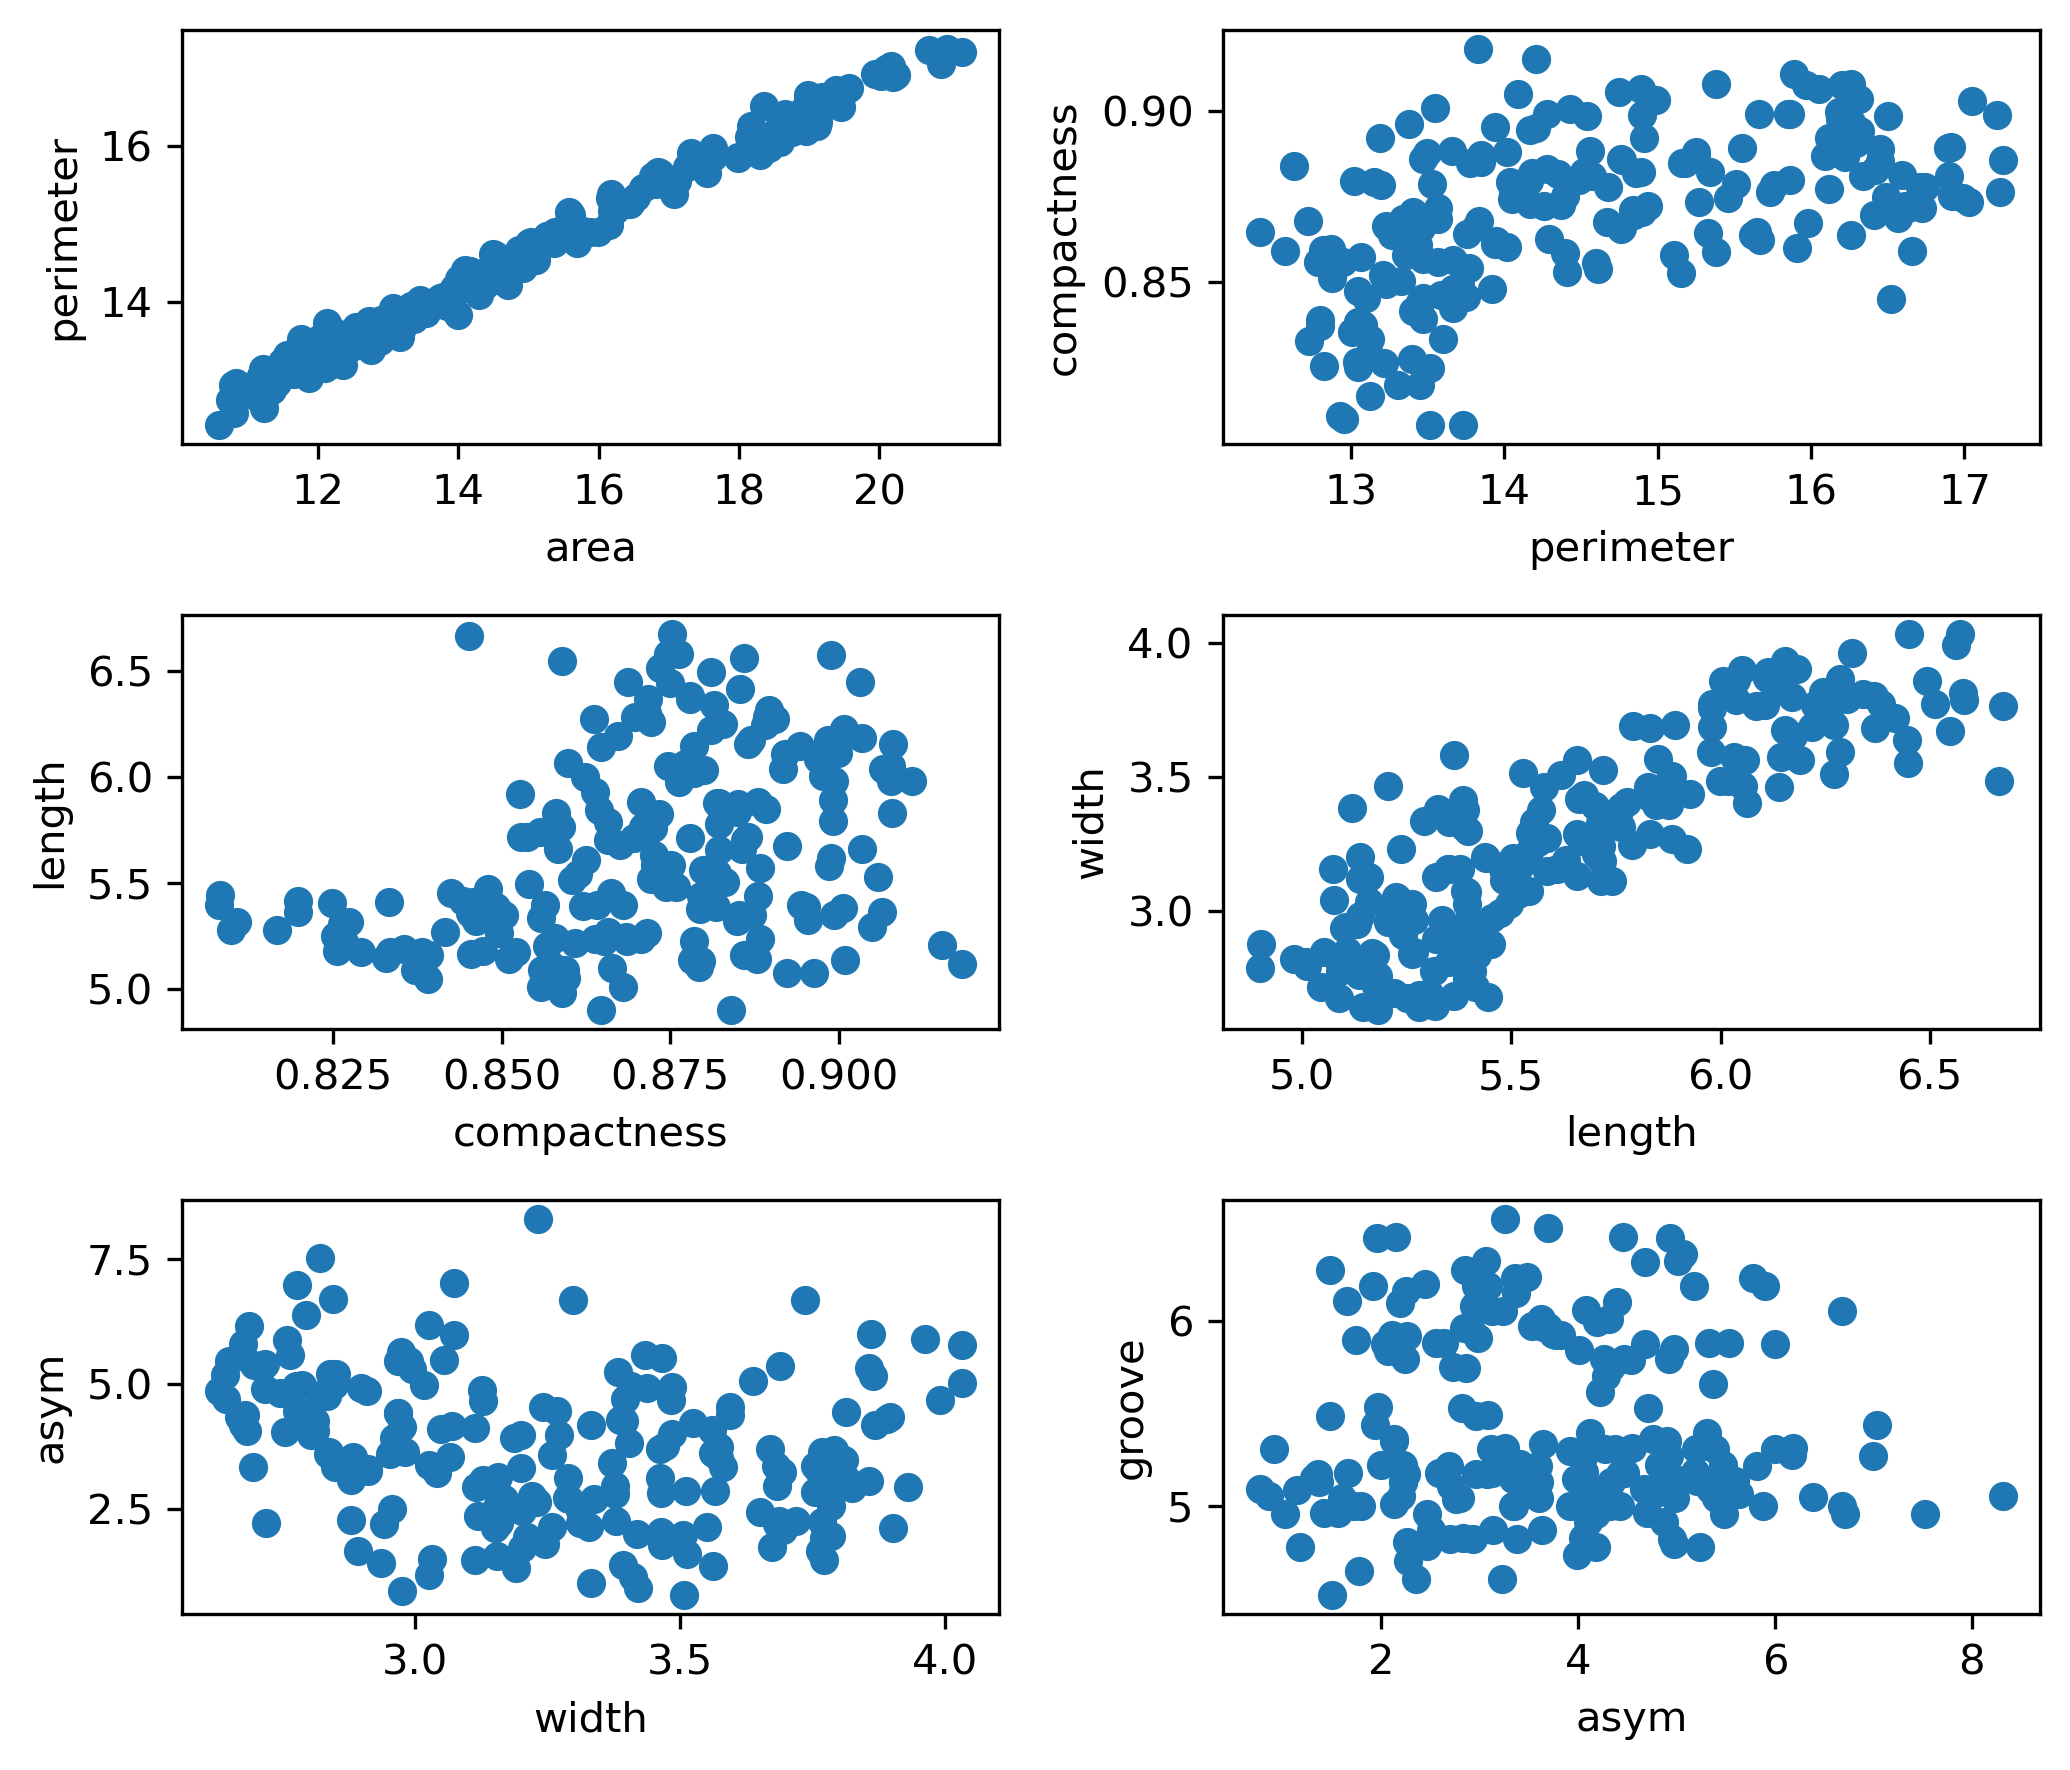

In [2]:
# take a quick look at the data
import matplotlib.pyplot as plt

nrows, ncols = 3, 2
fig = plt.figure(figsize = (7,6), dpi = 300)

for i in range(1, 7):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,i-1], data.iloc[:,i])
    ax.set_xlabel(data.columns[i-1])
    ax.set_ylabel(data.columns[i])

plt.tight_layout()
plt.show()

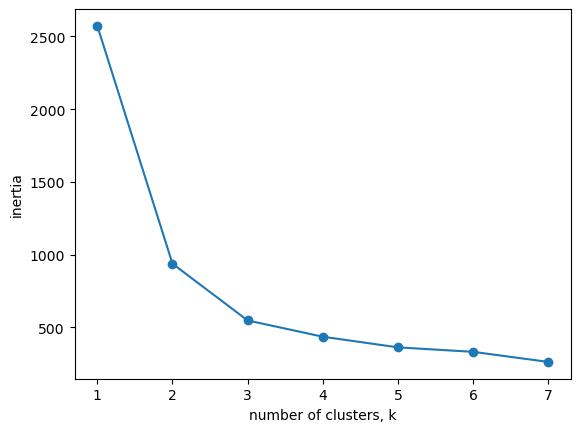

In [3]:
# how many clusters should we use?
# look at the trade off between inertia and number of clusters

# import packages
from sklearn.cluster import KMeans

inertias = []
ks = range(1, 8)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k, n_init='auto')
    
    # Fit model to samples, we exclude the last column that contains the variety label
    model.fit(data.iloc[:,0:7])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [4]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3, n_init='auto')

# Fit model to points
model.fit(data.iloc[:,0:7])

# get the centroids
centroids = model.cluster_centers_

# check the dimanesions of the centroids
print(centroids.shape)

(3, 7)


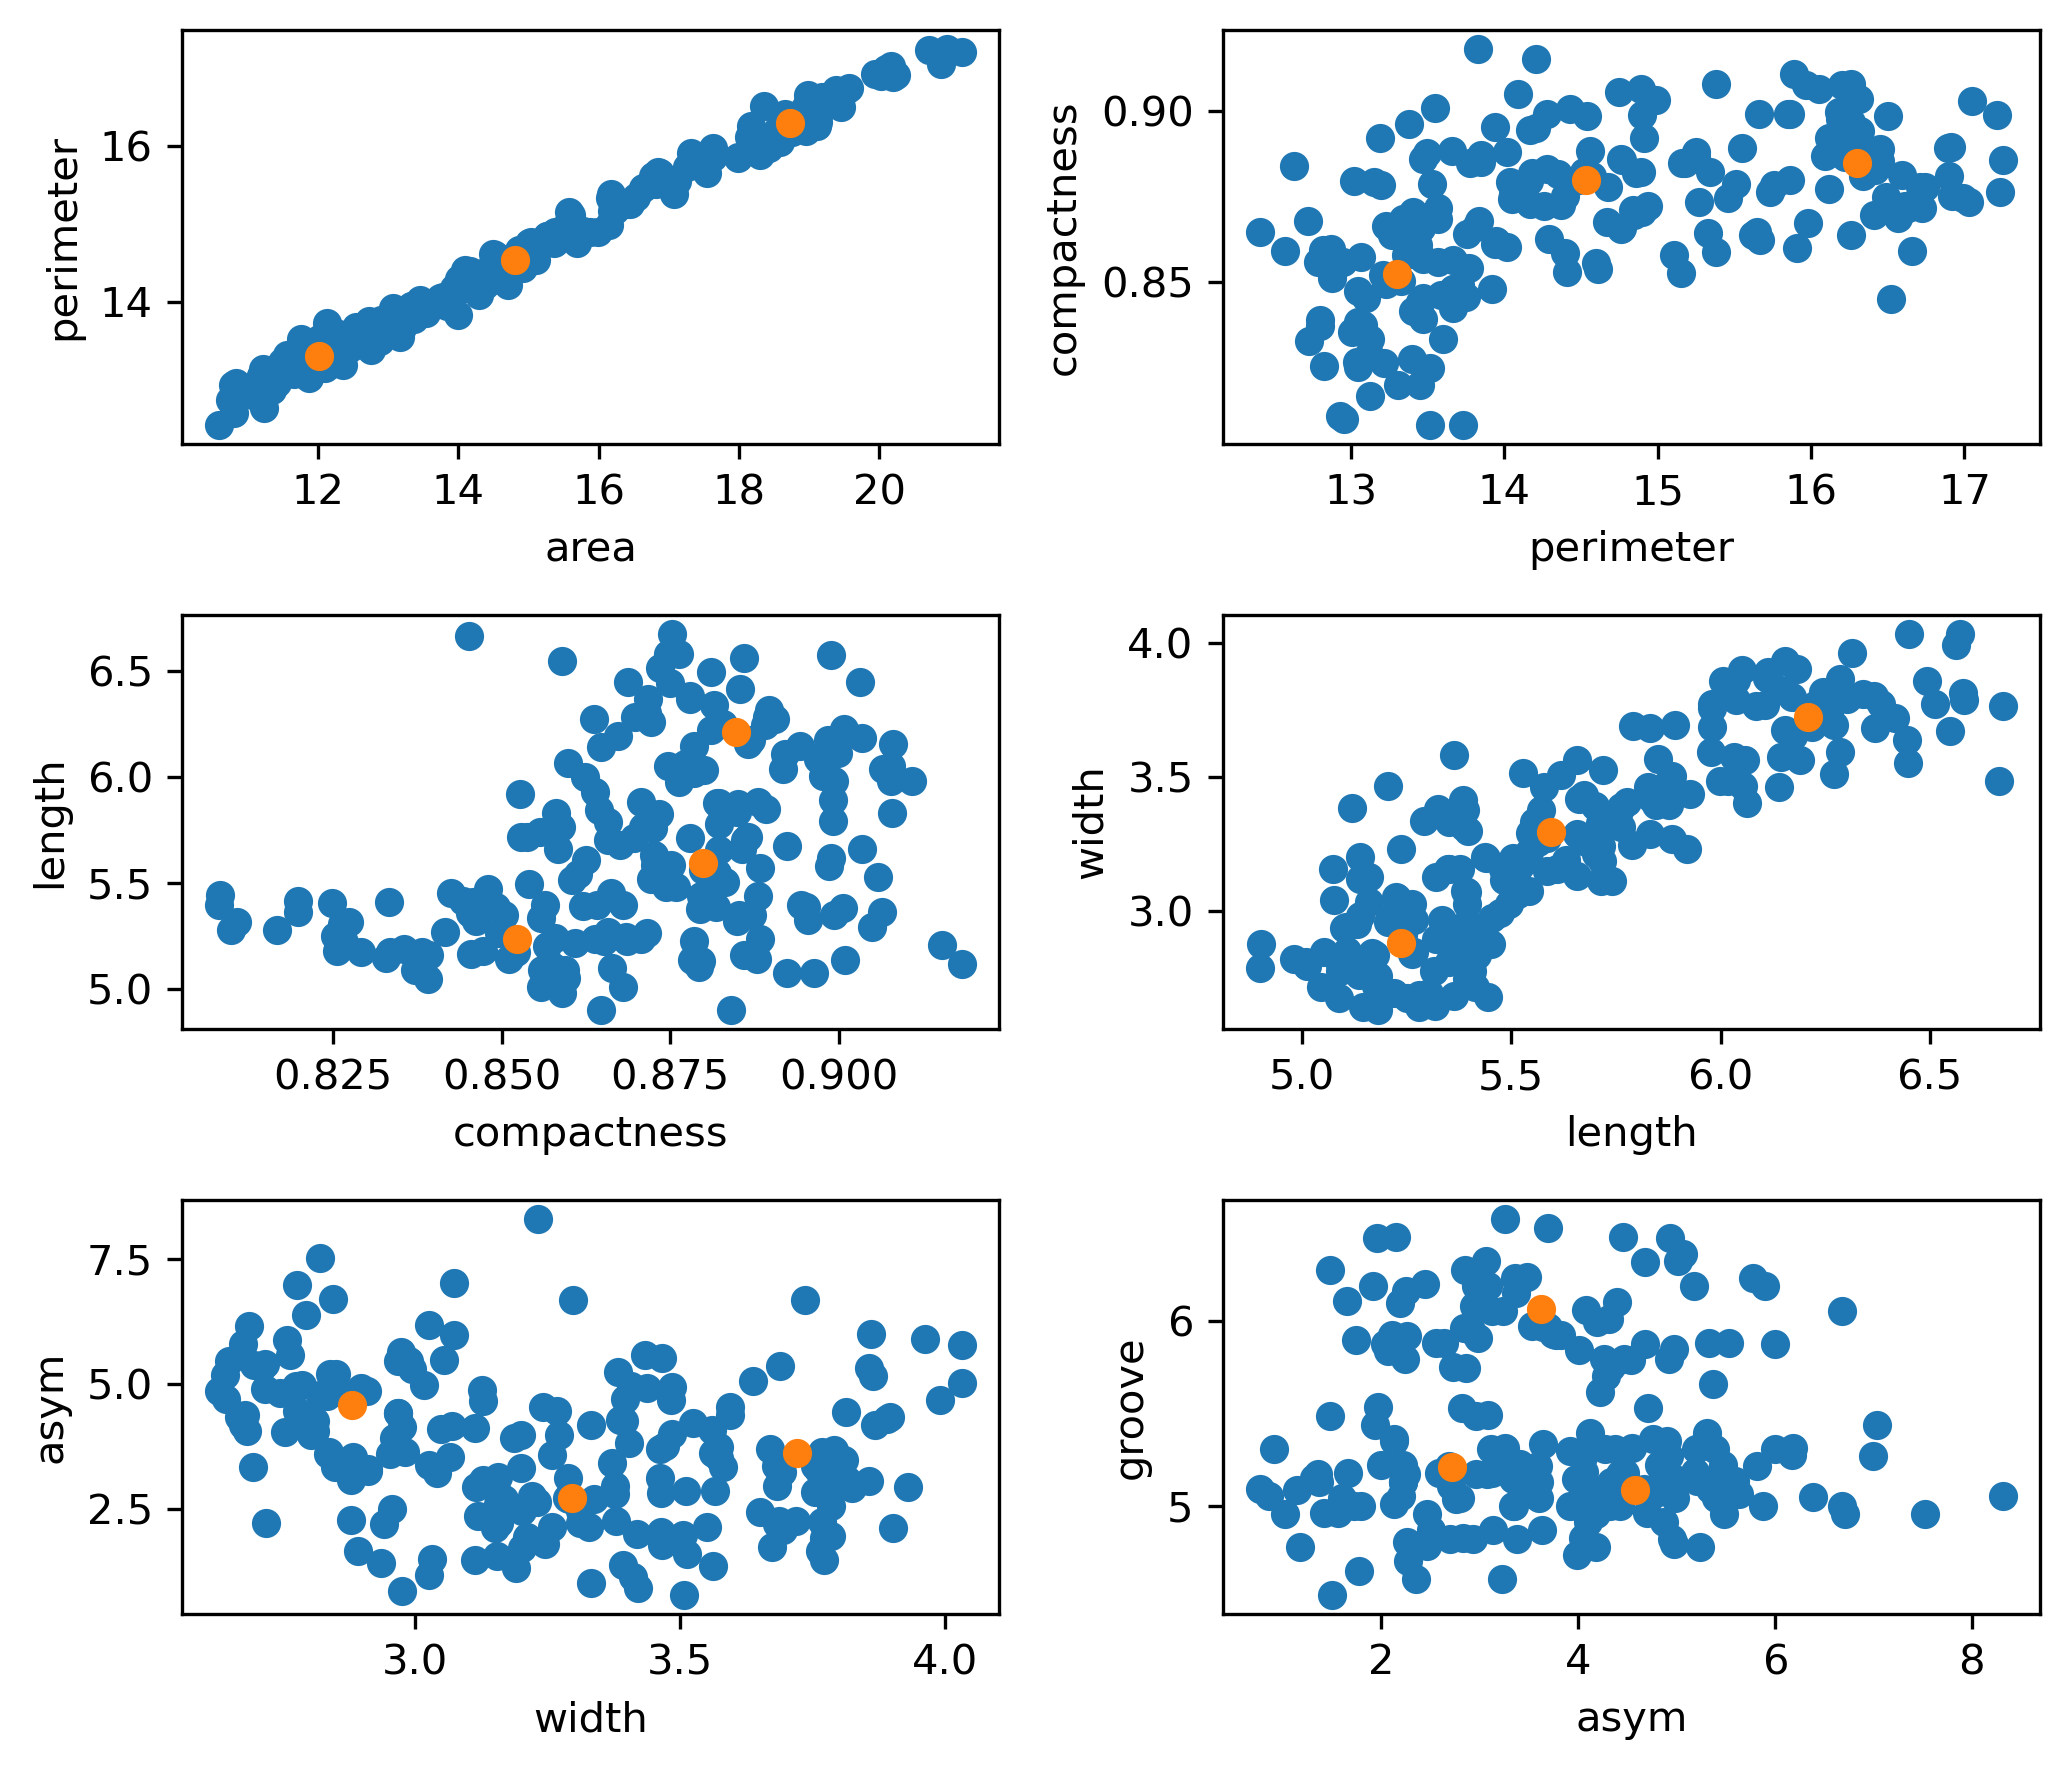

In [5]:
# check how the model centroids compare to the data


nrows, ncols = 3, 2
fig = plt.figure(figsize = (7,6), dpi = 300)

for i in range(1, 7):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,i-1], data.iloc[:,i])
    ax.scatter(centroids[:,i-1], centroids[:,i])
    ax.set_xlabel(data.columns[i-1])
    ax.set_ylabel(data.columns[i])

plt.tight_layout()
plt.show()

In [6]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(data)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': data.variety})

# Create a cross-tabulation of the original variety from the seeds data table and the model prediction
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties   1   2   3
labels               
0           4   0  65
1           1  59   0
2          61   9   0
